### Find Word Images Mask Fade

In [17]:
import cv2
import PIL
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import os
import sys
import pandas as pd
import numpy as np
import re
import glob
from pathlib import Path
import shutil
from os.path import isfile, join

In [18]:
# language pair
lang_folder = "Turkish"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> target language for learner
#lang_pair = "English"  # Arabic, English, French, German, Turkish, Spanish, Portuguese, Dutch, Italian ==> native language

file_ext = 1000

#image size
x_height_min = 50
y_width_min = 50

In [19]:
word_lemma_all_data_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-2-Word In Visual Genome Merge"

path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-3-Find Word Images Mask Fade"

Path(path).mkdir(parents=True, exist_ok=True)

In [20]:
def image_crop_blur(image_file, x_koor, y_koor, height, width, blur_radius=5, blur_part="outside"):
    '''image_crop_blur(image_file, x_koor, y_koor, height, width, blur_radius=5, crop_part="inside")\n
    image_file is a picture and x_koor, y_koor, height and width are its crop coordinates (x_koor,x_koor+height, y_koor,y_koor+width)\n
    blur_radius is GaussianBlur parameters, high value is more blurring, blur_part used for which part (outside and inside) wanted to blur.\n
    ex.\n
    result_list[4] = "\media\ssd\sample\895152896.jpg"\n
    height = 150\n
    width = 120\n
    x_koor = 25\n
    y_koor = 10\n
    image_crop_blur(result_list[4], x_koor=x_koor, y_koor=y_koor, height=height, width=width, blur_radius=7, blur_part="outside")
    '''
    img = Image.open(f"{image_file}")
    cropped_image = img.crop((x_koor, y_koor, x_koor+height, y_koor+width))
    if blur_part == "outside":
        blurred_img = img.filter(ImageFilter.GaussianBlur(radius=blur_radius))
        blurred_img.paste(cropped_image,(x_koor, y_koor, x_koor+height, y_koor+width))
        return blurred_img
    elif blur_part == "inside":
        blurred_img = cropped_image.filter(ImageFilter.GaussianBlur(radius=blur_radius))
        img.paste(blurred_img,(x_koor, y_koor, x_koor+height, y_koor+width))
        return img
    else:
        return img

##### Image Path

In [21]:
image_path = f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/Lemma Stem POS/Data/Visual Genome/images"
mask_blur_image_path = f"{image_path}/VG_Mask_Blur"

Path(mask_blur_image_path).mkdir(parents=True, exist_ok=True)

In [22]:
image_folder_list = glob.glob(f"{image_path}/*")
image_folder_list

['/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K_2',
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_Mask_Blur']

#### Visual Genome Word Lemma All Category Data

In [23]:
df_genome_word_lemma_all_category_concat = pd.read_excel(f"/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/{lang_folder.capitalize()}/\
Lemma Stem POS/Result/3-2-Word In Visual Genome Merge/Visual_Genome_{file_ext}_Word_Lemma_All_Category_Concat_Result.xlsx")
df_genome_word_lemma_all_category_concat # edit ana veri dosyası okunacak

,num,POS1,POS2,word,lemma.spacy,stem,word_en_translate,lemma_en_translate,frequency,object_id,...,x_koor,y_koor,attributes,sub_name,sub_object_id,questions,que_and_anw_id,answers,phrases,region_id
0,0,NUM,NaN,bir,bir,bir,a,a,18835735,4446407.0,...,126.0,305.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NUM,NaN,bir,bir,bir,a,a,18835735,3904298.0,...,150.0,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NUM,NaN,bir,bir,bir,a,a,18835735,3904300.0,...,182.0,233.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NUM,NaN,bir,bir,bir,a,a,18835735,3902259.0,...,142.0,168.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NUM,NaN,bir,bir,bir,a,a,18835735,3902256.0,...,0.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197129,197129,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,...,267.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,airport check in kiosks,4492506.0
197130,197130,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,...,17.0,459.0,NaN,NaN,NaN,NaN,NaN,NaN,red check of tablecloth,726657.0
197131,197131,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,...,301.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,a check is on the table,1814370.0
197132,197132,VERB,NaN,çekilin,çek,çek,withdraw,check,69201,NaN,...,405.0,194.0,NaN,NaN,NaN,NaN,NaN,NaN,cleats with white check,2132765.0


In [8]:
#df_genome_word_lemma_all_category_concat_num = df_genome_word_lemma_all_category_concat.reset_index(names="num")
#df_genome_word_lemma_all_category_concat_num

In [24]:
#df_genome_word_lemma_all_category_concat_num_dropna = df_genome_word_lemma_all_category_concat_num.dropna(subset=["height","width","x_koor","y_koor"])
#df_genome_word_lemma_all_category_concat_num_dropna = df_genome_word_lemma_all_category_concat_num_dropna[["num","word","lemma.spacy","stem","word_en_translate","image_id","height","width","x_koor","y_koor"]]
df_genome_word_lemma_all_category_concat_dropna = df_genome_word_lemma_all_category_concat.dropna(subset=["height","width","x_koor","y_koor"])
df_genome_word_lemma_all_category_concat_dropna = df_genome_word_lemma_all_category_concat_dropna[["num","word","lemma.spacy","stem","word_en_translate","image_id","height","width","x_koor","y_koor"]]
df_genome_word_lemma_all_category_concat_dropna

,num,word,lemma.spacy,stem,word_en_translate,image_id,height,width,x_koor,y_koor
0,0,bir,bir,bir,a,2390994,29.0,20.0,126.0,305.0
1,1,bir,bir,bir,a,2348965,129.0,190.0,150.0,113.0
2,2,bir,bir,bir,a,2348965,123.0,317.0,182.0,233.0
3,3,bir,bir,bir,a,2349861,46.0,15.0,142.0,168.0
4,4,bir,bir,bir,a,2349866,54.0,188.0,0.0,97.0
...,...,...,...,...,...,...,...,...,...,...
197129,197129,çekilin,çek,çek,withdraw,2317616,27.0,60.0,267.0,37.0
197130,197130,çekilin,çek,çek,withdraw,2400604,37.0,65.0,17.0,459.0
197131,197131,çekilin,çek,çek,withdraw,2386272,95.0,132.0,301.0,236.0
197132,197132,çekilin,çek,çek,withdraw,2371210,22.0,11.0,405.0,194.0


In [25]:
df_genome_word_lemma_all_category_concat_dropna_select = df_genome_word_lemma_all_category_concat_dropna[(df_genome_word_lemma_all_category_concat_dropna["height"] >= x_height_min) & (df_genome_word_lemma_all_category_concat_dropna["width"] >= y_width_min)]
df_genome_word_lemma_all_category_concat_dropna_select

,num,word,lemma.spacy,stem,word_en_translate,image_id,height,width,x_koor,y_koor
1,1,bir,bir,bir,a,2348965,129.0,190.0,150.0,113.0
2,2,bir,bir,bir,a,2348965,123.0,317.0,182.0,233.0
4,4,bir,bir,bir,a,2349866,54.0,188.0,0.0,97.0
7,7,bir,bir,bir,a,2350230,167.0,282.0,178.0,95.0
10,10,bir,bir,bir,a,2350444,148.0,129.0,4.0,351.0
...,...,...,...,...,...,...,...,...,...,...
197121,197121,çekilin,çek,çek,withdraw,2365274,107.0,205.0,68.0,2.0
197123,197123,çekilin,çek,çek,withdraw,2387284,53.0,73.0,34.0,384.0
197124,197124,çekilin,çek,çek,withdraw,2400843,104.0,139.0,7.0,57.0
197128,197128,çekilin,çek,çek,withdraw,2333148,461.0,219.0,84.0,35.0


In [26]:
image_id_list = list(set(df_genome_word_lemma_all_category_concat_dropna_select["image_id"]))
len(image_id_list)

In [27]:
def image_id_koor_path_crop_blur(df,image_id_column,image_id,image_path,output_path,image_path_addition="*",xheight="height",ywidth="width",xkoor="x_koor",ykoor="y_koor",num_col="num"):
    df_dropna = df.dropna(subset=[f'{xheight}',f'{ywidth}',f'{xkoor}',f'{ykoor}'])
    df_var_result = df_dropna[df_dropna[f"{image_id_column}"] == image_id]
    for i in range(len(df_var_result)):
        df_var = df_var_result.iloc[[i],]
        num = int(df_var.loc[:,f"{num_col}"])     
        height = int(df_var.loc[:,f"{xheight}"])
        width = int(df_var.loc[:,f"{ywidth}"])
        x_koor = int(df_var.loc[:,f"{xkoor}"])
        y_koor = int(df_var.loc[:,f"{ykoor}"])
        image_path_file_result = glob.glob(f"{image_path}/{image_path_addition}/{image_id}.jpg")[0]
        image_out = image_crop_blur(image_path_file_result, x_koor, y_koor, height, width, blur_radius=5, blur_part="outside")
        image_out.save(f"{output_path}/{image_id}_{num}_mask_blur.jpg")

In [28]:
for image_id in image_id_list:
    image_id_koor_path_crop_blur(df_genome_word_lemma_all_category_concat_dropna_select,"image_id",image_id,image_path,mask_blur_image_path,image_path_addition="*",xheight="height",ywidth="width",xkoor="x_koor",ykoor="y_koor",num_col="num")

In [12]:
df_var_result = df_genome_word_lemma_all_category_concat_dropna_select[df_genome_word_lemma_all_category_concat_dropna_select["image_id"] == 2348965]
df_var_result

,num,word,lemma.spacy,stem,word_en_translate,image_id,height,width,x_koor,y_koor
1,1,bir,bir,bir,a,2348965,129.0,190.0,150.0,113.0
2,2,bir,bir,bir,a,2348965,123.0,317.0,182.0,233.0
89512,89512,kaptan,kaptan,kaptan,captain,2348965,333.0,149.0,3.0,24.0
89514,89514,kaptan,kaptan,kaptan,captain,2348965,241.0,131.0,156.0,69.0
89648,89648,kaptan,kaptan,kaptan,captain,2348965,323.0,140.0,12.0,27.0


In [13]:
len(df_var_result)

5

In [16]:
df_var_result.iloc[[4],] 

,num,word,lemma.spacy,stem,word_en_translate,image_id,height,width,x_koor,y_koor
89648,89648,kaptan,kaptan,kaptan,captain,2348965,323.0,140.0,12.0,27.0


In [16]:
#result_list = []
#def image_id_koor_path(df,image_id_column,image_id,image_path,image_path_addition="*",xheight="height",ywidth="width",xkoor="x_koor",ykoor="y_koor"):
#    df_dropna = df.dropna(subset=[f'{xheight}',f'{ywidth}',f'{xkoor}',f'{ykoor}'])
#    df_var = df_dropna[df_dropna[f"{image_id_column}"] == image_id].head(1)
#    height = int(df_var.loc[:,f"{xheight}"])
#    width = int(df_var.loc[:,f"{ywidth}"])
#    x_koor = int(df_var.loc[:,f"{xkoor}"])
#    y_koor = int(df_var.loc[:,f"{ykoor}"])
#    image_path_result = glob.glob(f"{image_path}/{image_path_addition}/{image_id}.jpg")[0]    
#    result_list.append(height)             # 0
#    result_list.append(width)              # 1
#    result_list.append(x_koor)             # 2
#    result_list.append(y_koor)             # 3
#    result_list.append(image_path_result)  # 4    
#    
#    return result_list # print(f"height:{height} \nwidth:{width} \nx_koor:{x_koor} \ny_koor:{y_koor} \nimage_path_result:{image_path_result}")

#### Parameter

In [17]:
image_id = 2383389
result_list = []
image_id_koor_path(df_genome_word_lemma_all_category_concat,"image_id",image_id,image_path)

[137,
 170,
 234,
 134,
 '/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K_2/2383389.jpg']

In [18]:
df_genome_word_lemma_all_category_concat[df_genome_word_lemma_all_category_concat["image_id"] == image_id].head(1).transpose()

,374
POS1,PRON
POS2,NaN
word,bu
lemma.spacy,bu
stem,bu
word_en_translate,this
lemma_en_translate,this
frequency,11062659
object_id,1321213.0
names,"scissors , red-handled scissors"


In [19]:
height = result_list[0]
width = result_list[1]
x_koor = result_list[2]
y_koor = result_list[3]

#### Image Blurring

##### Pillow

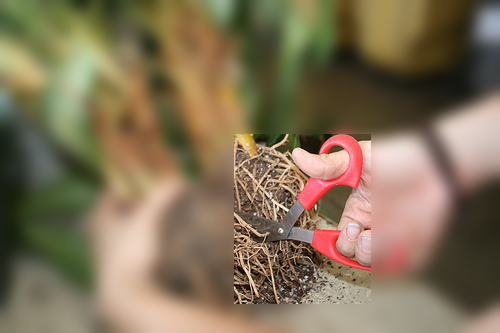

In [102]:
image_crop_blur(result_list[4], x_koor=x_koor, y_koor=y_koor, height=height, width=width, blur_radius=7, blur_part="outside")

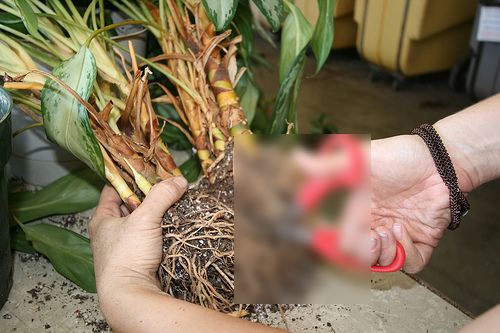

In [97]:
image_crop_blur(result_list[4], x_koor=x_koor, y_koor=y_koor, height=height, width=width, blur_radius=5, blur_part="inside")

In [80]:
result_list[4]

'/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/Turkish/Lemma Stem POS/Data/Visual Genome/images/VG_100K_2/2383389.jpg'

In [81]:
image_new = image_crop_blur(result_list[4], x_koor=x_koor, y_koor=y_koor, height=height, width=width, blur_part="inside")

In [82]:
image_new.save(f"{image_id}_blurring3.jpg")

#### Copy Move And Delete

In [44]:
output_file = glob.glob(f"")
output_file

[]

In [45]:
for l in output_file:
    source = l # source directory
    destination = path
    shutil.copy2(source, destination)

In [46]:
for j in output_file:
    try:
        os.remove(j)
    except:
        pass